## Load libraries and data csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Used_car_prices_in_Pakistan 2021_rawD.csv')

In [4]:
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [5]:
df.describe(include='all')

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
count,80572,80572,73800,80572,80572.000000,80572.000000,80572,80572.000000,80572,80572
unique,66,389,1339,2229,NaN,NaN,2,NaN,187,2
top,Toyota,Corolla,GLi 1.3 VVTi,Call for price,NaN,NaN,Local,NaN,Lahore,Automatic
freq,29793,15502,3319,1209,NaN,NaN,54498,NaN,27051,40408
mean,NaN,NaN,NaN,NaN,2011.724209,1404.083267,NaN,85653.660080,NaN,NaN
std,NaN,NaN,NaN,NaN,6.953399,684.458171,NaN,82241.870901,NaN,NaN
min,NaN,NaN,NaN,NaN,1990.000000,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2007.000000,1000.000000,NaN,36500.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2013.000000,1300.000000,NaN,73000.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2017.000000,1600.000000,NaN,110520.000000,NaN,NaN


In [6]:
df.shape

(80572, 10)

In [7]:
df.dtypes

Make               object
Model              object
Version            object
Price              object
Make_Year           int64
CC                  int64
Assembly           object
Mileage             int64
Registered City    object
Transmission       object
dtype: object

## Convert price from object to float

In [8]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [9]:
df.Price.dtypes

dtype('float64')

In [10]:
# drop version column   
df.drop('Version', axis=1, inplace=True)
missing_values = df['Price'].isnull().sum()
print(missing_values)

1209


In [11]:
df.isnull().sum()

Make                  0
Model                 0
Price              1209
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

In [12]:
df.describe(include='all')

,Make,Model,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
count,80572,80572,7.936300e+04,80572.000000,80572.000000,80572,80572.000000,80572,80572
unique,66,389,NaN,NaN,NaN,2,NaN,187,2
top,Toyota,Corolla,NaN,NaN,NaN,Local,NaN,Lahore,Automatic
freq,29793,15502,NaN,NaN,NaN,54498,NaN,27051,40408
mean,NaN,NaN,2.558124e+06,2011.724209,1404.083267,NaN,85653.660080,NaN,NaN
std,NaN,NaN,3.695094e+06,6.953399,684.458171,NaN,82241.870901,NaN,NaN
min,NaN,NaN,1.000000e+05,1990.000000,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,9.500000e+05,2007.000000,1000.000000,NaN,36500.000000,NaN,NaN
50%,NaN,NaN,1.725000e+06,2013.000000,1300.000000,NaN,73000.000000,NaN,NaN
75%,NaN,NaN,2.870000e+06,2017.000000,1600.000000,NaN,110520.000000,NaN,NaN


In [13]:
df.head()

,Make,Model,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,2600000.0,2017,1300,Local,55000,Islamabad,Manual


## Remove missing price rows

In [14]:
df.dropna(subset="Price",inplace=True)

In [15]:
df.shape

(79363, 9)

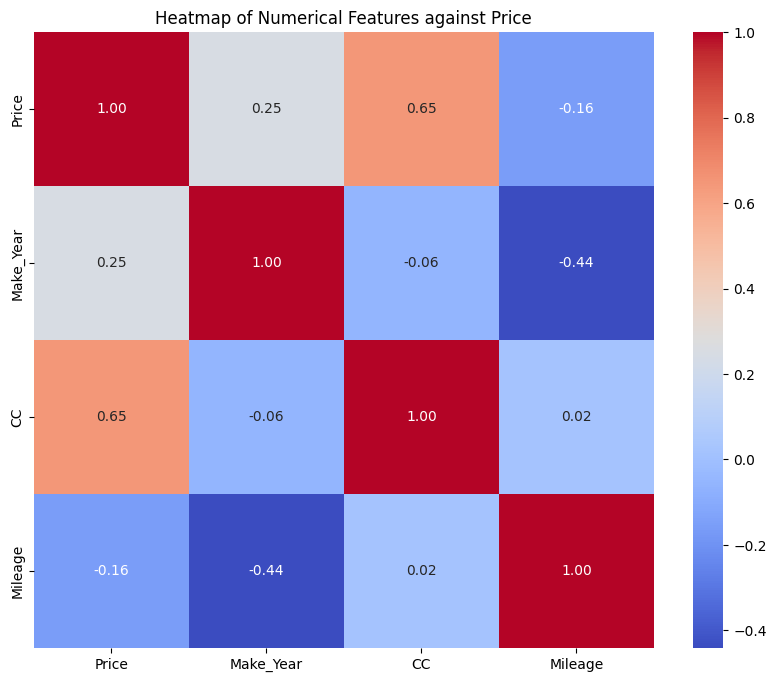

In [16]:
numerical_df = df[['Price', 'Make_Year', 'CC', 'Mileage']]

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Features against Price')
plt.show()

In [17]:
def print_min_max(df, column):
    print(f"{column} min: {df[column].min()}")
    print(f"{column} max: {df[column].max()}")


print_min_max(df, 'Price')
print_min_max(df, 'Mileage')
print_min_max(df, 'CC')

Price min: 100000.0
Price max: 95000000.0
Mileage min: 1
Mileage max: 999999
CC min: 1
CC max: 10000


C:\Users\mujtaba\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

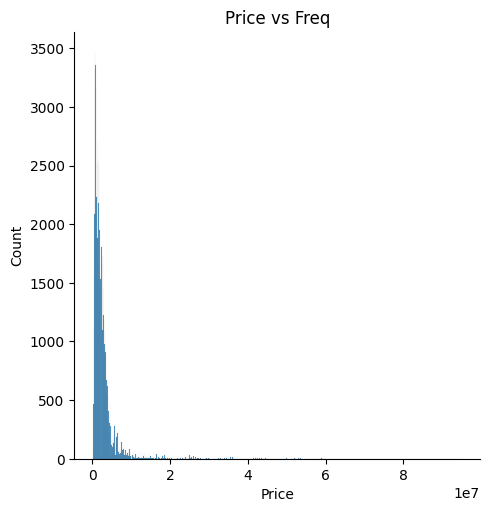

In [18]:
plt.figure(figsize=(10, 6))
sns.displot(df["Price"])
plt.title('Price vs Freq')
plt.show()


## We can see the price data is skewed due to outliers, so we remove too large values

C:\Users\mujtaba\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Price vs Freq')

<Figure size 1000x600 with 0 Axes>

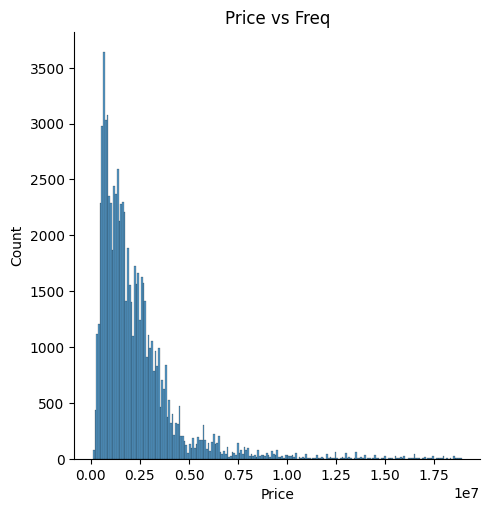

In [19]:
# remove 0.99 quantile price
df = df[df['Price'] < df['Price'].quantile(0.99)]
# plot price distribution
plt.figure(figsize=(10, 6))
sns.displot(df["Price"])
plt.title('Price vs Freq')


In [20]:
# print car data with min and max cc and mileage
print(df[df['CC'] == df['CC'].min()])
# cc 1 is not possible

         Make    Model      Price  Make_Year  CC  Assembly  Mileage  \
876    Toyota     Vitz  1950000.0       2011   1  Imported    10000   
1312   Toyota  Coaster  6500000.0       2011   1  Imported   123454   
8241   Suzuki    Carry   930000.0       2016   1     Local        1   
13554  Suzuki     Alto  1100000.0       2008   1  Imported        5   
14977  Toyota     Vitz  2850000.0       2018   1  Imported    59000   
15421  Toyota  Corolla  2150000.0       2014   1  Imported   120000   

      Registered City Transmission  
876            Lahore    Automatic  
1312           Lahore       Manual  
8241       Rawalpindi       Manual  
13554       Islamabad    Automatic  
14977   Un-Registered    Automatic  
15421          Lahore       Manual  


In [21]:
print(df[df['CC'] == df['CC'].max()])
# 10000 CC not possible

         Make   Model      Price  Make_Year     CC  Assembly  Mileage  \
4283   Toyota   Passo  1860000.0       2014  10000  Imported    64000   
12920  Suzuki  Khyber   170000.0       1991  10000     Local   100000   

      Registered City Transmission  
4283          Karachi    Automatic  
12920         Karachi       Manual  


## Remove outliers from CC max and min

In [22]:
# remove 0.01 and 0.99 quartile from CC
df = df[df['CC'] > df['CC'].quantile(0.01)]
df = df[df['CC'] < df['CC'].quantile(0.99)]


In [23]:
print_min_max(df, 'CC')

CC min: 700
CC max: 3950


In [24]:

print(df[df['Mileage'] == df['Mileage'].min()])


          Make     Model       Price  Make_Year    CC Assembly  Mileage  \
84     Changan    Alsvin   2950000.0       2021  1500    Local        1   
115     Toyota  Fortuner  10700000.0       2021  2800    Local        1   
244    Changan      A800    900000.0       2021  1000    Local        1   
687     Suzuki      Alto    490000.0       2005  1000    Local        1   
747     Toyota   Corolla   1450000.0       2006  1300    Local        1   
...        ...       ...         ...        ...   ...      ...      ...   
80063   Suzuki    Mehran    740000.0       2014   800    Local        1   
80097   Toyota     Hilux   7850000.0       2021  2800    Local        1   
80355      KIA  Sportage   5730000.0       2021  2000    Local        1   
80364   Suzuki    Cultus    670000.0       2006  1000    Local        1   
80365      KIA  Sportage   5750000.0       2021  2000    Local        1   

      Registered City Transmission  
84      Un-Registered    Automatic  
115     Un-Registered    

In [25]:
# print max milage car
#  A conventional car can last for 200,000 miles. Some well-maintained car models will reach 300,000 or more miles total.
print(df[df['Mileage'] == df['Mileage'].max()])

          Make    Model      Price  Make_Year    CC  Assembly  Mileage  \
23435  Hyundai   Santro   560000.0       2001  1000  Imported   999999   
23575    Honda    Civic   650000.0       1995  1500     Local   999999   
72334   Suzuki  Potohar   520000.0       1995   860     Local   999999   
72530   Nissan    Sunny   350000.0       1993  1300  Imported   999999   
73449   Suzuki   Mehran   360000.0       1999   800     Local   999999   
76107    Honda    Civic  1500000.0       2007  1800     Local   999999   

      Registered City Transmission  
23435       Islamabad       Manual  
23575          Lahore       Manual  
72334          Sukkur       Manual  
72530         Karachi       Manual  
73449          Lahore       Manual  
76107       Islamabad       Manual  


In [26]:
# remove 0.99 and 0.01 quantile from mileage

df = df[df['Mileage'] < df['Mileage'].quantile(0.99)]
df = df[df['Mileage'] > df['Mileage'].quantile(0.01)]

print_min_max(df, 'Mileage')

Mileage min: 2
Mileage max: 392788


In [27]:

# car can have 1lm mileage but problem is how can a car made in 2006 only have 1 km mileage
print(df[df['Mileage'] == df['Mileage'].min()])


          Make     Model      Price  Make_Year    CC Assembly  Mileage  \
2110       KIA  Sportage  5800000.0       2021  2000    Local        2   
2137    Toyota   Corolla  4470000.0       2021  1800    Local        2   
2508    Suzuki      Alto   520000.0       2007   860    Local        2   
3234     Honda     Civic   920000.0       2021  1800    Local        2   
3716    Toyota     Yaris  3210000.0       2021  1500    Local        2   
...        ...       ...        ...        ...   ...      ...      ...   
76454    Honda     Civic   890000.0       2002  1600    Local        2   
77340  Hyundai    Tucson  6325000.0       2021  2000    Local        2   
80245   Toyota   Corolla  1850000.0       2005  1300    Local        2   
80250   Toyota   Corolla  1900000.0       2001  1500    Local        2   
80570      FAW      X-PV   600000.0       2013  1000    Local        2   

      Registered City Transmission  
2110    Un-Registered    Automatic  
2137    Un-Registered    Automatic  


## Scale price with log

C:\Users\mujtaba\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

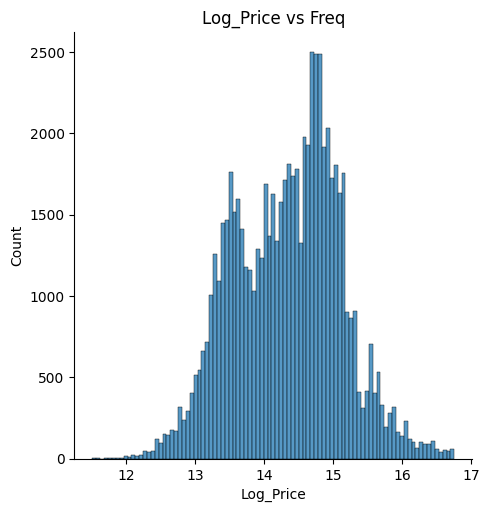

In [28]:
df["Log_Price"] = np.log(df["Price"])
plt.figure(figsize=(10, 6))
sns.displot(df["Log_Price"])
plt.title('Log_Price vs Freq')
plt.show()

## As registered cities are too many, we club data into registered or not registered

In [29]:
city_stats = df.groupby('Registered City').agg({'Log_Price': ['mean', 'count']})
city_stats.columns = ['Mean Price', 'Frequency']
city_stats = city_stats.sort_values(by='Frequency', ascending=False)
city_stats = city_stats.reset_index()

unregistered_city_stats = df[df['Registered City'] == 'Un-Registered']
unregistered_frequency = unregistered_city_stats.shape[0]
unregistered_mean_price = unregistered_city_stats['Log_Price'].mean()

print("City-wise Statistics:")
print(city_stats.head(20))
print("\nFrequency of Unregistered Cities:", unregistered_frequency)
print("Mean Price of Cars in Unregistered Cities:", unregistered_mean_price)


City-wise Statistics:
   Registered City  Mean Price  Frequency
0           Lahore   14.223944      24107
1          Karachi   14.226360      16215
2        Islamabad   14.590404      15199
3    Un-Registered   15.154158       6154
4           Multan   13.784064       1518
5       Rawalpindi   13.834663       1498
6       Faisalabad   13.678669       1127
7         Peshawar   13.904595        762
8          Sialkot   13.871298        407
9       Gujranwala   13.619118        297
10      Bahawalpur   13.668479        253
11       Hyderabad   14.092698        168
12  Rahim Yar Khan   13.558077        156
13        Sargodha   13.628239        122
14          Quetta   14.024209         92
15       Abottabad   13.785102         90
16     Mirpur A.K.   13.891837         88
17         Sahiwal   13.735910         81
18          Jehlum   13.607740         73
19          Gujrat   13.904043         69

Frequency of Unregistered Cities: 6154
Mean Price of Cars in Unregistered Cities: 15.1541582752

In [30]:
def draw_boxplot(col_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col_name, y='Log_Price', data=df)
    plt.title('Boxplot of Price against ' + col_name)
    plt.show()

## Compare boxplot of various features

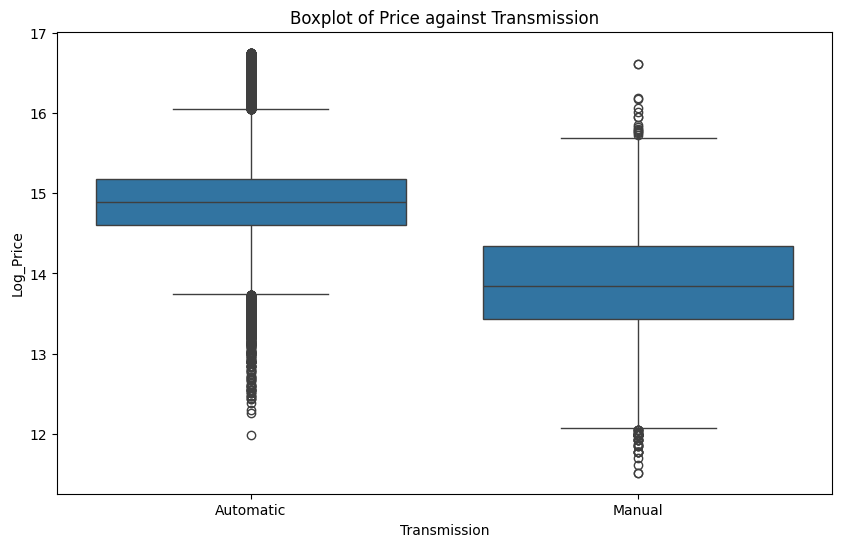

In [31]:
draw_boxplot('Transmission')

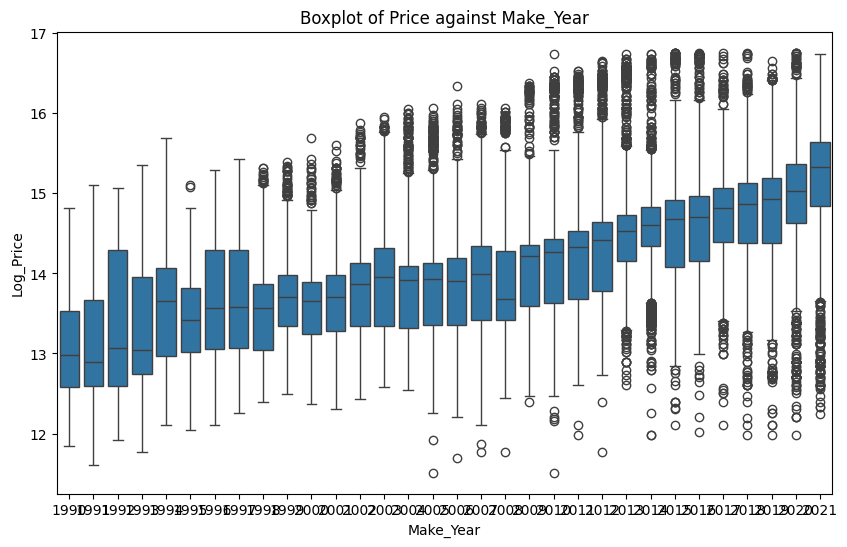

In [32]:
draw_boxplot('Make_Year')

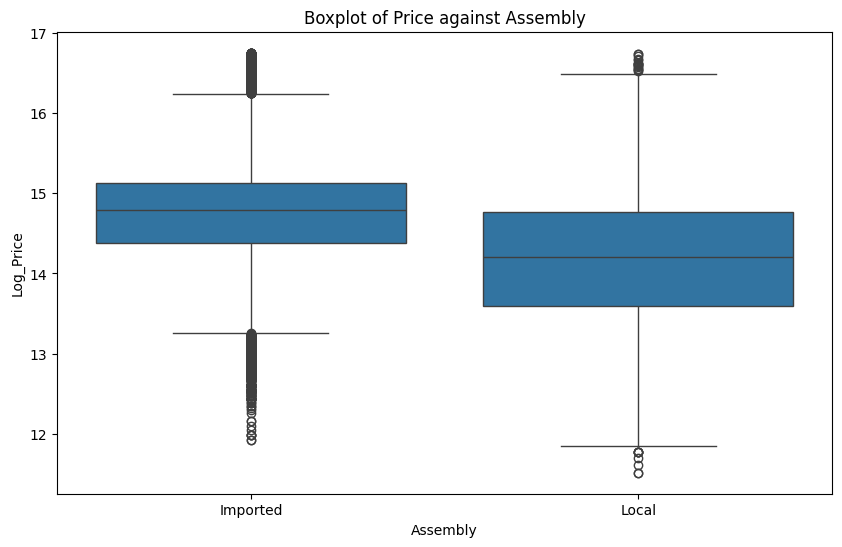

In [33]:
draw_boxplot('Assembly')

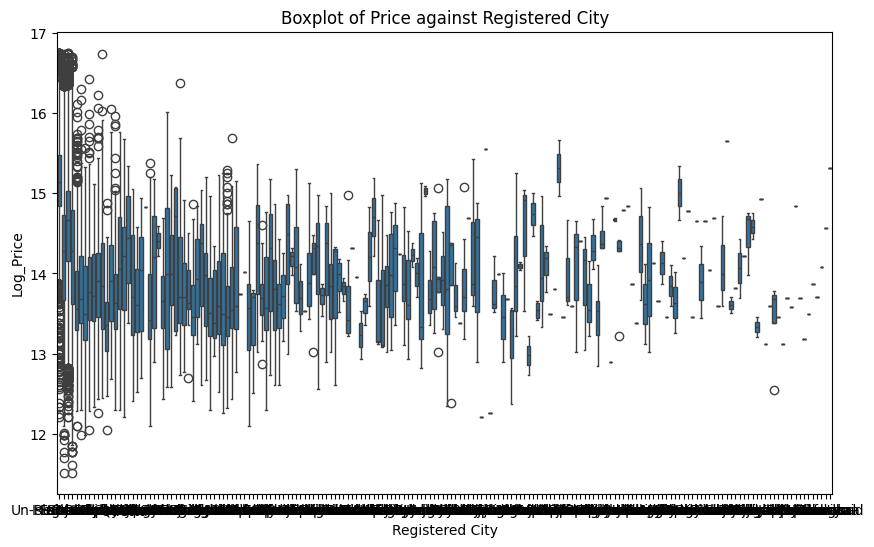

In [34]:
draw_boxplot('Registered City')

### Scale other features as well (we wont use Make and Model features)

In [35]:
df["Log_Mileage"] = np.log(df["Mileage"]) # Scale Mileage
df["Log_CC"] = np.log(df["CC"]) # Scale CC
df["Ordered_Make_Year"] = df["Make_Year"] - 1990 # Make year labelled from 1990 0-31 ordinal
df['Is_Automatic'] = df['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0) # 1 if automatic 0 if manual
df['Is_Imported'] = df['Assembly'].apply(lambda x: 1 if x == 'Imported' else 0) # 1 if imported 0 if local
df["Is_Registered"] = df["Registered City"].apply(lambda x: 0 if x == "Un-Registered" else 1) # 1 if registered 0 if unregistered



In [36]:
df.head

<bound method NDFrame.head of          Make    Model      Price  Make_Year    CC  Assembly  Mileage  \
0       Honda  Insight  7400000.0       2019  1500  Imported     2000   
2        Audi       A6  9300000.0       2015  1800     Local    70000   
3      Toyota     Aqua  2375000.0       2014  1500  Imported    99900   
4       Honda     City  2600000.0       2017  1300     Local    55000   
6      Toyota  Corolla  2500000.0       2017  1300     Local    80000   
...       ...      ...        ...        ...   ...       ...      ...   
80566  Toyota  Corolla  2100000.0       2012  1300     Local   125000   
80567  Suzuki    Bolan   750000.0       2015   800     Local    98000   
80569  Toyota  Corolla  2700000.0       2016  1300     Local    81000   
80570     FAW     X-PV   600000.0       2013  1000     Local        2   
80571   Honda    Civic  2620000.0       2013  1800  Imported   100000   

      Registered City Transmission  Log_Price  Log_Mileage    Log_CC  \
0       Un-Registered

In [37]:
df.describe(include='all')

,Make,Model,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Log_Price,Log_Mileage,Log_CC,Ordered_Make_Year,Is_Automatic,Is_Imported,Is_Registered
count,69472,69472,6.947200e+04,69472.000000,69472.000000,69472,69472.000000,69472,69472,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000,69472.000000
unique,61,332,NaN,NaN,NaN,2,NaN,180,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,Corolla,NaN,NaN,NaN,Local,NaN,Lahore,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,27224,15045,NaN,NaN,NaN,51299,NaN,24107,37863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.276139e+06,2011.453478,1400.705119,NaN,83660.308398,NaN,NaN,14.339150,10.681001,7.184961,21.453478,0.454989,0.261587,0.911418
std,NaN,NaN,2.020569e+06,7.000340,517.250221,NaN,61705.741409,NaN,NaN,0.777306,1.963271,0.338702,7.000340,0.497973,0.439502,0.284142
min,NaN,NaN,1.000000e+05,1990.000000,700.000000,NaN,2.000000,NaN,NaN,11.512925,0.693147,6.551080,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,9.100000e+05,2007.000000,1000.000000,NaN,40000.000000,NaN,NaN,13.721200,10.596635,6.907755,17.000000,0.000000,0.000000,1.000000
50%,NaN,NaN,1.800000e+06,2013.000000,1300.000000,NaN,75000.000000,NaN,NaN,14.403297,11.225243,7.170120,23.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,2.900000e+06,2017.000000,1600.000000,NaN,113000.000000,NaN,NaN,14.880221,11.635143,7.377759,27.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


#  features and target 
X = df[['Log_Mileage', 'Log_CC', 'Ordered_Make_Year', 'Is_Automatic', 'Is_Imported', 'Is_Registered']]
y = df['Log_Price']

# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# scale only continuous features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Log_Mileage', 'Log_CC', 'Ordered_Make_Year'])
    ],
    remainder='passthrough'  
    # leave categorical features unchanged
)

# fit on training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

X_train_tensor = torch.tensor(X_train_transformed.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).view(-1, 1)
X_val_tensor = torch.tensor(X_val_transformed.astype(np.float32))
y_val_tensor = torch.tensor(y_val.values.astype(np.float32)).view(-1, 1)

#  data loaders 
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=64, shuffle=False)


We are going to use a simple neural network for the linear regression problem.
Mean square error loss is used to find difference in actual and predicted values. 
Adam optimizer is used as it converges the best due to adaptive learning rate, momentum etc.


In [39]:

# define simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(input_size=X.shape[1])

# define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1/32, Train Loss: 169.0547, Val Loss: 141.3370
Epoch 2/32, Train Loss: 118.9273, Val Loss: 97.9686
Epoch 3/32, Train Loss: 81.1693, Val Loss: 65.5604
Epoch 4/32, Train Loss: 53.3618, Val Loss: 42.1439
Epoch 5/32, Train Loss: 33.7852, Val Loss: 26.2056
Epoch 6/32, Train Loss: 20.9793, Val Loss: 16.2888
Epoch 7/32, Train Loss: 13.3569, Val Loss: 10.6655
Epoch 8/32, Train Loss: 9.0990, Val Loss: 7.5174
Epoch 9/32, Train Loss: 6.6024, Val Loss: 5.5716
Epoch 10/32, Train Loss: 4.9965, Val Loss: 4.2939
Epoch 11/32, Train Loss: 3.9407, Val Loss: 3.4659
Epoch 12/32, Train Loss: 3.2699, Val Loss: 2.9455
Epoch 13/32, Train Loss: 2.8315, Val Loss: 2.5764
Epoch 14/32, Train Loss: 2.4818, Val Loss: 2.2451
Epoch 15/32, Train Loss: 2.1436, Val Loss: 1.9164
Epoch 16/32, Train Loss: 1.8085, Val Loss: 1.5953
Epoch 17/32, Train Loss: 1.4873, Val Loss: 1.2963
Epoch 18/32, Train Loss: 1.1936, Val Loss: 1.0273
Epoch 19/32, Train Loss: 0.9349, Val Loss: 0.7958
Epoch 20/32, Train Loss: 0.7151, Val Loss:

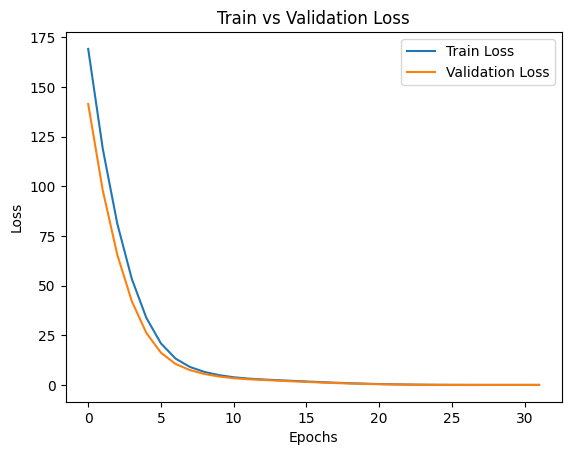

In [40]:


# training loop
n_epochs = 32
train_losses = []
val_losses = []

min_val = float('inf')
for epoch in range(n_epochs):
    # training
    model.train()
    train_loss = 0
    # iterate over each batch
    for inputs, targets in train_loader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # backward pass
        loss.backward()
        optimizer.step()
        # update running training loss
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # validation
    model.eval()
    with torch.no_grad():
        val_loss = 0
        # iterate over each batch
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
        # update running validation loss
        val_loss /= len(val_loader)
        if val_loss < min_val:
            min_val = val_loss
            torch.save(model.state_dict(), 'car_best_model.pth')
        val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# plot the train and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [42]:
# load the best model
model.load_state_dict(torch.load('car_best_model.pth'))
model.eval()
with torch.no_grad():
    for inputs, targets in val_loader:
        predicted_prices = model(inputs)
        actual_prices = targets
        
        for actual, predicted in zip(actual_prices, predicted_prices):
            actual_price = np.exp(actual.item())
            predicted_price = np.exp(predicted.item())
            
            print("Actual Price:", actual_price)
            print("Predicted Price:", predicted_price)
            print()


Actual Price: 5720002.002480607
Predicted Price: 5329411.681998724

Actual Price: 1875000.4425816664
Predicted Price: 1894961.449537107

Actual Price: 624999.8371076974
Predicted Price: 599971.2133283507

Actual Price: 2149999.9859193102
Predicted Price: 2518105.740558501

Actual Price: 3050001.432965393
Predicted Price: 2353805.822335124

Actual Price: 824999.8039945078
Predicted Price: 1150682.566076363

Actual Price: 1430000.4951728384
Predicted Price: 979400.4269564556

Actual Price: 3810001.2228247086
Predicted Price: 3913927.1088896138

Actual Price: 3650001.276396731
Predicted Price: 3673352.5169598395

Actual Price: 4350000.390869507
Predicted Price: 4405413.185335181

Actual Price: 2759999.1470402637
Predicted Price: 2684533.737470345

Actual Price: 870000.0520123187
Predicted Price: 1010116.0958040346

Actual Price: 2999999.2045487547
Predicted Price: 3349930.985092208

Actual Price: 1589999.7594587498
Predicted Price: 1398055.3649427802

Actual Price: 4499998.887505561
Predi

## We also try a random forest regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

# dont need to scale the data for random forest
rf_regressor = RandomForestRegressor()

# fit the regressor 
rf_regressor.fit(X_train, y_train)



RandomForestRegressor()

In [44]:
y_pred = rf_regressor.predict(X_val)


In [45]:
# calculate val loss
val_loss = np.mean((y_pred - y_val) ** 2)
print(f'Validation Loss For RF: {val_loss:.4f}')

Validation Loss For RF: 0.0722


### Shows slightly better performance than Linear Regression model

In [46]:
y_val_array = y_val.values  # y_val is a pandas series convert to numpy array

for i in range(len(y_val_array)):
    actual_price = np.exp(y_val_array[i])
    predicted_price = np.exp(y_pred[i])
    print("Actual Price:", actual_price)
    print("Predicted Price:", predicted_price)
    print()


Actual Price: 5720000.000000004
Predicted Price: 5484144.387533274

Actual Price: 1874999.9999999995
Predicted Price: 1858491.212811928

Actual Price: 625000.0000000002
Predicted Price: 647266.8783301319

Actual Price: 2149999.999999999
Predicted Price: 2291536.7926555015

Actual Price: 3049999.999999998
Predicted Price: 2881764.752626583

Actual Price: 824999.9999999997
Predicted Price: 903837.4510193741

Actual Price: 1430000.0000000007
Predicted Price: 1017861.4916882841

Actual Price: 3810000.000000001
Predicted Price: 3699785.0649372195

Actual Price: 3649999.9999999995
Predicted Price: 3674095.317542439

Actual Price: 4350000.0
Predicted Price: 4235268.782624875

Actual Price: 2760000.0000000014
Predicted Price: 2947970.9750175043

Actual Price: 869999.9999999992
Predicted Price: 952743.4112957009

Actual Price: 3000000.0000000023
Predicted Price: 2776536.8858988984

Actual Price: 1590000.0000000014
Predicted Price: 1747983.7043899307

Actual Price: 4500000.0
Predicted Price: 329